          Total number of missing values  Percentage of missing values
age                                    0                           0.0
sex                                    0                           0.0
cp                                     0                           0.0
trtbps                                 0                           0.0
chol                                   0                           0.0
fbs                                    0                           0.0
restecg                                0                           0.0
thalachh                               0                           0.0
exng                                   0                           0.0
oldpeak                                0                           0.0
slp                                    0                           0.0
caa                                    0                           0.0
thall                                  0                           0.0
output

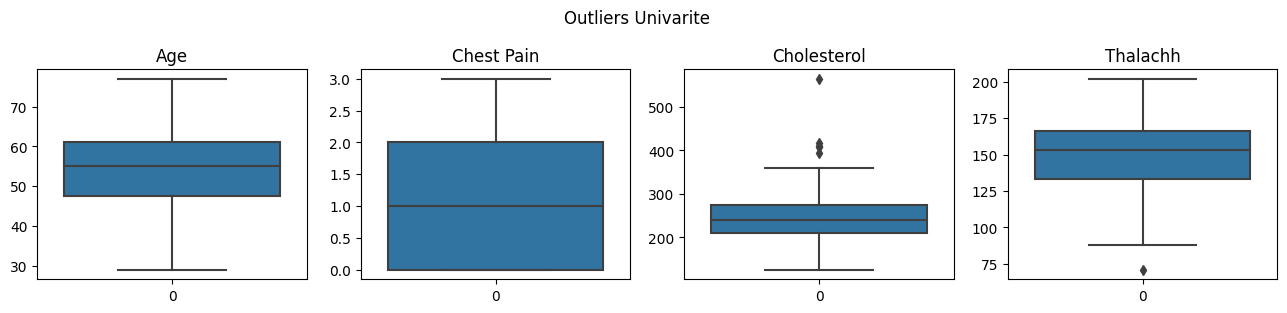

76.22950819672131
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        55
           1       0.80      0.76      0.78        67

    accuracy                           0.76       122
   macro avg       0.76      0.76      0.76       122
weighted avg       0.76      0.76      0.76       122



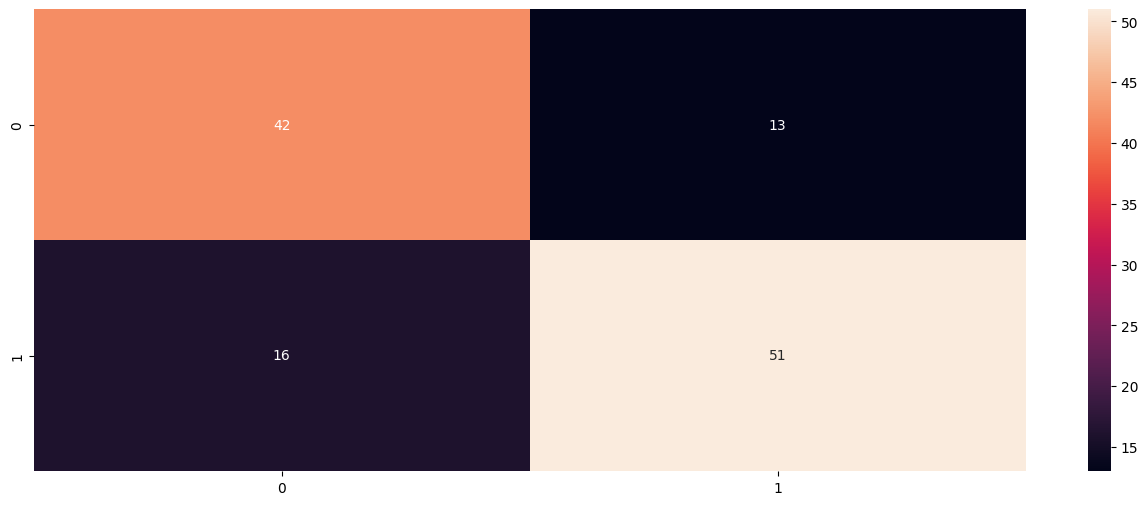

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Import data by using pandas
data = pd.read_csv("heart2.csv")

# Check if there is any null values or percantage of null values
x = data.isnull().sum()
y = (data.isnull().sum()/data.shape[0])*100
z = {'Total number of missing values':x,'Percentage of missing values':y}
df = pd.DataFrame(z,columns=['Total number of missing values','Percentage of missing values'])
df.sort_values(by='Percentage of missing values', ascending=True)
print(df)

#check if there is any outliers in dataset
plt.rcParams['figure.figsize']= (16,6)

plt.subplot(2,4,1)
sns.boxplot(data['age'])
plt.title('Age')

plt.subplot(2,4,2)
sns.boxplot(data['cp'])
plt.title('Chest Pain')

plt.subplot(2,4,3)
sns.boxplot(data['chol'])
plt.title('Cholesterol')

plt.subplot(2,4,4)
sns.boxplot(data['thalachh'])
plt.title('Thalachh')

plt.suptitle("Outliers Univarite")
plt.show()


# divide the dataset for training and testing
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=1)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred=model.predict((x_test))

#confuse matrix
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_pred,y_test)
sns.heatmap(cn, annot=True)

from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_pred, y_test)*100)
print(classification_report(y_pred,y_test))
